In [68]:
import geopandas as gpd
import momepy
from shapely.geometry import JOIN_STYLE,MultiPolygon, Polygon
import matplotlib.pyplot as plt
import libpysal
from shapely.ops import voronoi_diagram
from shapely.ops import unary_union
from shapely.geometry import JOIN_STYLE,MultiPolygon, Polygon
import matplotlib.pyplot as plt
import GeoTool

# 数据获取

In [24]:
# 读取边（街道轴线）
edges = gpd.read_file("road_network_cache/Nanjing_Yihe/Nanjing_Yihe_edges.shp").to_crs("EPSG:32650")
# 读取节点（交叉点）
nodes = gpd.read_file("road_network_cache/Nanjing_Yihe/Nanjing_Yihe_nodes.shp").to_crs("EPSG:32650")
# 读取POI（百度地图点）
pois = gpd.read_file("road_network_cache/Nanjing_Yihe/Nanjing_Yihe_poi_baidu.shp").to_crs("EPSG:32650")
# 读取Building（建筑地图）
buildings = gpd.read_file("road_network_cache/Nanjing_Yihe/Nanjing_Yihe_buildings.shp").to_crs("EPSG:32650")


print(pois)

    source                 baidu_uid              name  \
0    baidu  453b3d8d5bd647bfc4effb89        美味饭店(西康路店)   
1    baidu  5e53af1aa035ce464151c05e          华东饭店-中餐厅   
2    baidu  db4e63fbaad29fda246e9833        河海大学-研究生食堂   
3    baidu  4cf8d24eb4d23bfd9df77982       钱塘园饭店(钱塘路店)   
4    baidu  b9e5d0b8bdd4c6a581a12ecd       上海精菜馆(虎踞关店)   
..     ...                       ...               ...   
402  baidu  ed11eacf547222ff4151c013      河海影视会堂-地上停车场   
403  baidu  8f9afbde061816391a11d5e6    汉口西路200号小区-停车场   
404  baidu  c0fe521af45d036340e19265  华夏银行(城西支行)-地上停车场   
405  baidu  9c8ed9be58d2c885b426551d           虎踞路·草场门   
406  baidu  d7109727d3917c3d7ab55cd4   虎踞北路12号综合楼南楼停车场   

                          address province city area  \
0                      西康路24号107室      江苏省  南京市  鼓楼区   
1             宁海路街道北京西路67号(省政府对面)      江苏省  南京市  鼓楼区   
2           宁海路街道西康路1号河海大学内（近西康路）      江苏省  南京市  鼓楼区   
3                      西康路钱塘路14号院      江苏省  南京市  鼓楼区   
4                  江苏省南

# 计算地块获取

D:\STUDY\anaconda3\envs\urban_morphology\lib\site-packages\geopandas\array.py:1638: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 50N (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


0      121052.111372
2       13141.104860
3       61179.413805
6       91016.088327
10      35046.419018
           ...      
185     23576.861965
186     17533.471535
191     17268.572330
192     15965.184026
197     15970.915281
Length: 86, dtype: float64


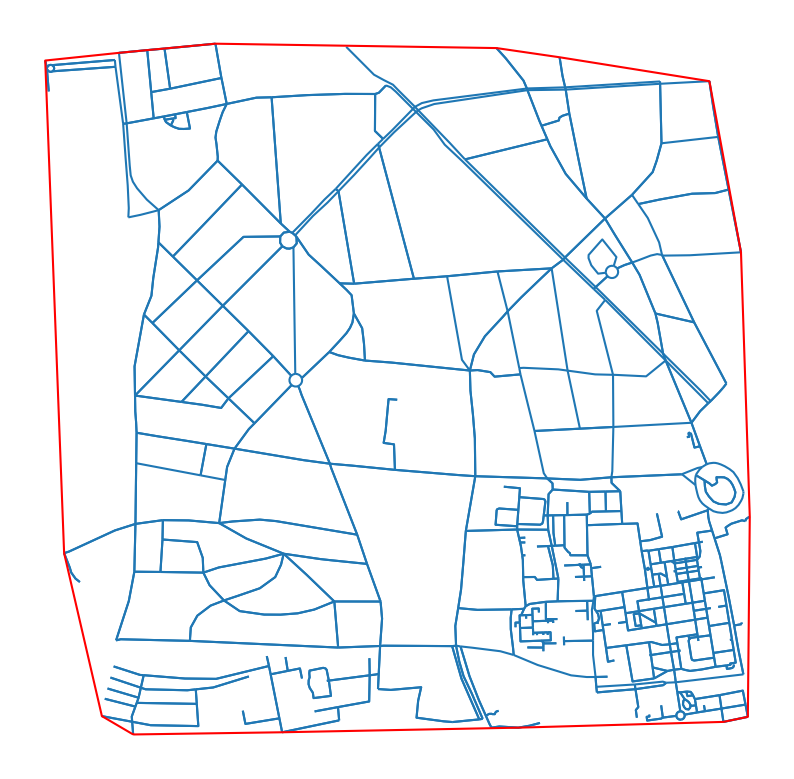

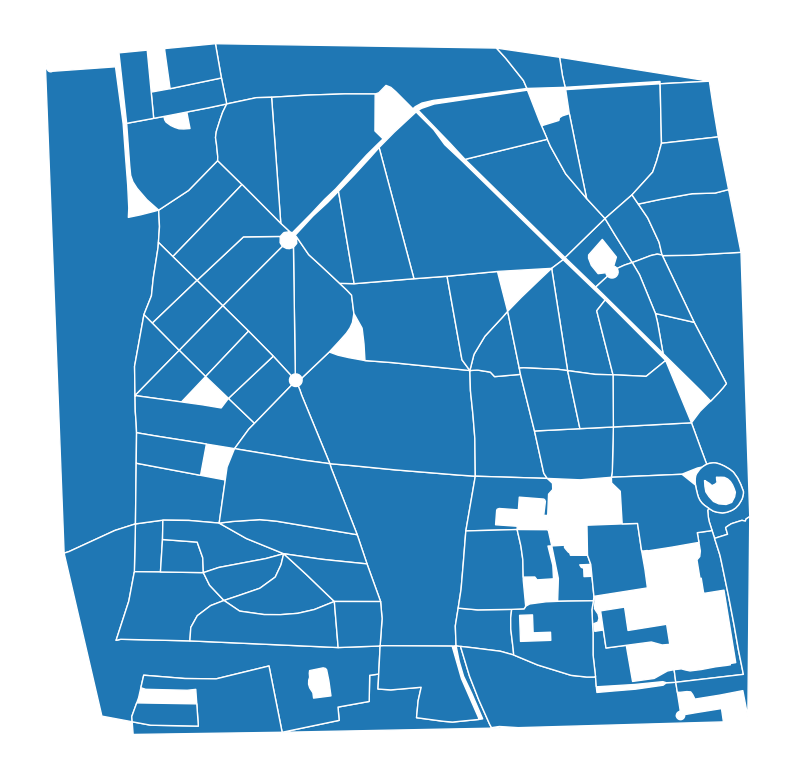

In [37]:
roads = edges.copy()
convex_hull = roads.union_all().convex_hull
enclosures = momepy.enclosures(roads, limit=convex_hull)
enclosures = enclosures[enclosures.area >10000]
ax = roads.plot(figsize=(10, 10))
hull =gpd.GeoDataFrame(geometry=[convex_hull.boundary],crs="EPSG:32650")
hull.plot(ax=ax, color="r")
ax.set_axis_off()
enclosures.plot(figsize=(10, 10), edgecolor="w").set_axis_off()
print(enclosures.area)

# 建筑数据预处理

0    LineString
dtype: object


<Axes: >

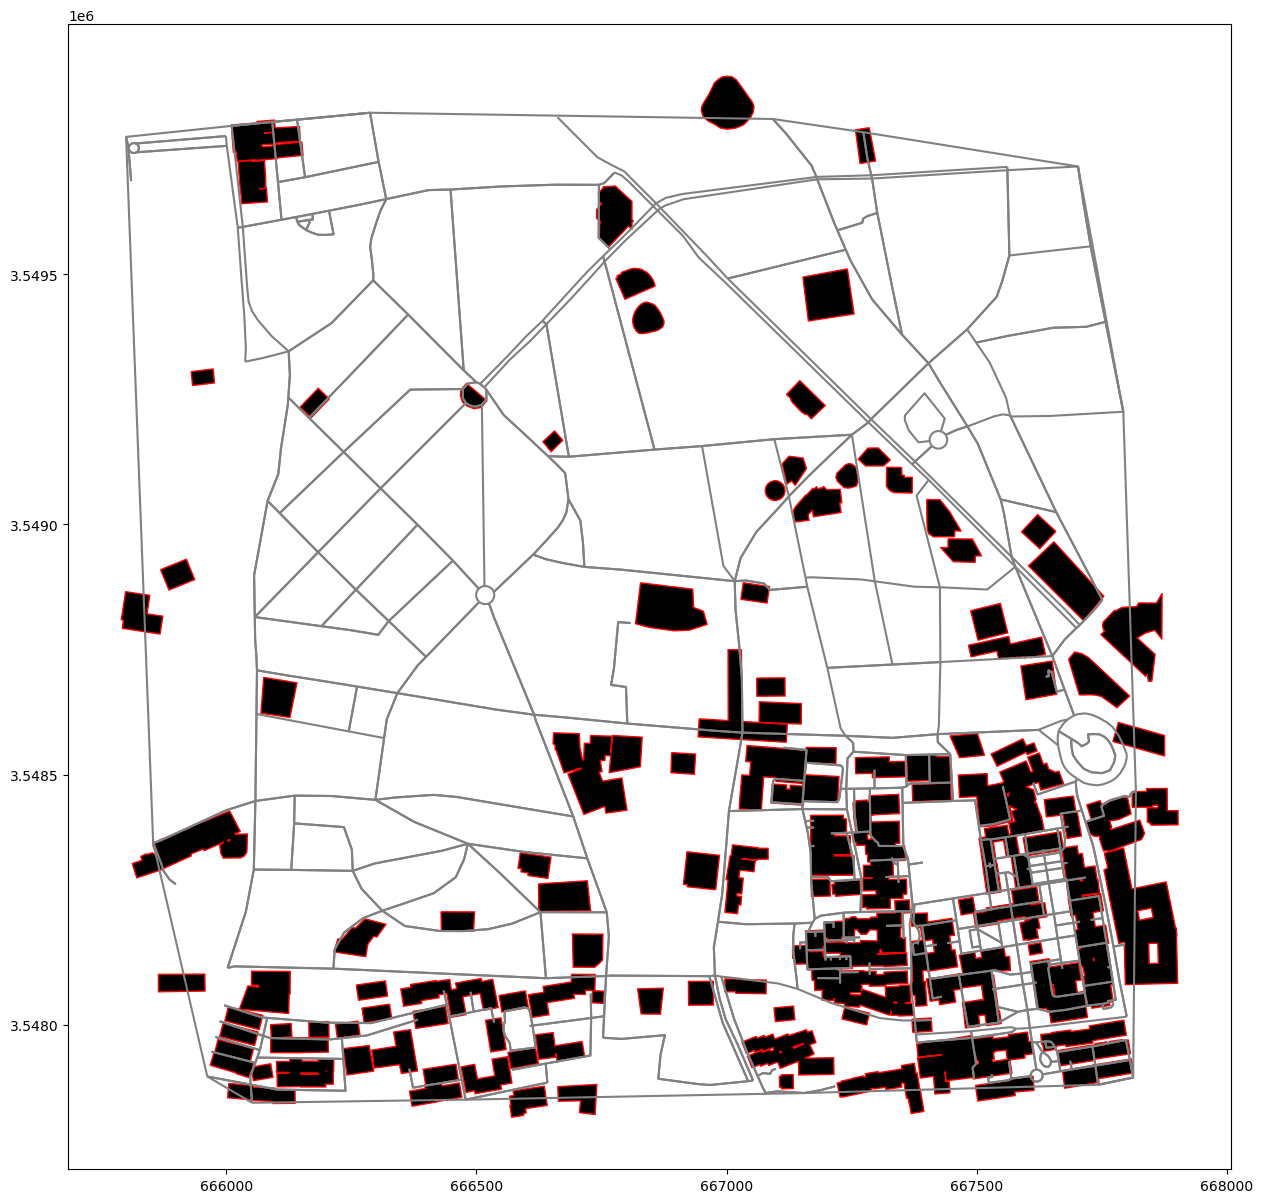

In [49]:

print(hull.type)
split_gdf = GeoTool.create_split_gdf(buildings,convex_hull)
fig, ax = plt.subplots(figsize=(15, 15))
split_gdf.plot(ax=ax, color="black",edgecolor="red")
roads.plot(ax=ax, color="grey",)
hull.plot(ax=ax,color="grey")

In [73]:
import GeoTool
skeleton_raw, skeleton_clean, skeleton_total = GeoTool.generate_skeletons_from_buildings(buildings=split_gdf, enclosures=enclosures)


AttributeError: module 'GeoTool' has no attribute 'generate_skeletons_from_buildings'